# Getting started with `bsuite`

[bit.ly/bsuite-tutorial-colab](http://bit.ly/bsuite-tutorial-colab)

The Behaviour Suite, or `bsuite` for short, is a collection of experiments that investigate the core capabilities of a reinforcement learning (RL) agent.
- This notebook is designed to get you up to speed on the [open source code](www.github.com/deepmind/bsuite) for running `bsuite`.
- You can read more about the project via the [arXiv paper](linktopaper.com).




## Imports / installation

In this section we will use `pip` to install `bsuite`.

Make sure that you are running a Python 3 runtime.

In [ ]:
#@title Installing bsuite
!git clone https://github.com/deepmind/bsuite.git
!pip install -q bsuite/

Cloning into 'bsuite'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 1741 (delta 79), reused 63 (delta 35), pack-reused 1603
Receiving objects: 100% (1741/1741), 692.67 KiB | 16.89 MiB/s, done.
Resolving deltas: 100% (1249/1249), done.


In [ ]:
#@title Basic imports
import bsuite

## Experiments
`bsuite` defines a set of *experiments*. 
In the context of `bsuite` an *experiment* consists of three parts:
1. **Environments:** a fixed set of configurations of an RL environment (e.g. a 5-armed bandit with variable levels of noise).
2. **Protocol**: a fixed regime of agent/environment interaction (e.g. 100 episodes of experience).
3. **Analysis**: a fixed set of procedures to maps agent *behaviour* to results and plots.

Each configuration within an experiment is identified by a string identifier called `bsuite_id`. 
<br> Each `bsuite_id` is constructed by concatenating experiment name, the separator `/`, and a number identifyng the specific configuration.
<br> The valid `bsuite_id` are defined in `bsuite.sweep`.

In [ ]:
#@title Valid Ids across all experiments:
from bsuite import sweep
print('All possible values for bsuite_id:', sweep.SWEEP)

All possible values for bsuite_id: ('bandit/0', 'bandit/1', 'bandit/2', 'bandit/3', 'bandit/4', 'bandit/5', 'bandit/6', 'bandit/7', 'bandit/8', 'bandit/9', 'bandit/10', 'bandit/11', 'bandit/12', 'bandit/13', 'bandit/14', 'bandit/15', 'bandit/16', 'bandit/17', 'bandit/18', 'bandit/19', 'bandit_noise/0', 'bandit_noise/1', 'bandit_noise/2', 'bandit_noise/3', 'bandit_noise/4', 'bandit_noise/5', 'bandit_noise/6', 'bandit_noise/7', 'bandit_noise/8', 'bandit_noise/9', 'bandit_noise/10', 'bandit_noise/11', 'bandit_noise/12', 'bandit_noise/13', 'bandit_noise/14', 'bandit_noise/15', 'bandit_noise/16', 'bandit_noise/17', 'bandit_noise/18', 'bandit_noise/19', 'bandit_scale/0', 'bandit_scale/1', 'bandit_scale/2', 'bandit_scale/3', 'bandit_scale/4', 'bandit_scale/5', 'bandit_scale/6', 'bandit_scale/7', 'bandit_scale/8', 'bandit_scale/9', 'bandit_scale/10', 'bandit_scale/11', 'bandit_scale/12', 'bandit_scale/13', 'bandit_scale/14', 'bandit_scale/15', 'bandit_scale/16', 'bandit_scale/17', 'bandit_scal

## Exploring an example experiment

<img src="https://storage.cloud.google.com/bsuite-colab-images/bandit.png" alt="bandit diagram" height="300"/>

One simple experiment in `bsuite` is called *bandit noise*.
<br>
This corresponds to a number of instantiations of a simple independent 11-armed bandit problem,<br>where the rewards for each arms are perturbed by white Gaussian noise $N(0, \sigma^2)$.

**Environments**:
- The actions have rewards in [0.0, 0.1, .., 1.0] randomly assigned.
- Run 4 seeds for each $\sigma$ in [0.1, 0.3, 1., 3, 10]

**Protocol**:
- run each configuration for 10k episodes,


**Analysis**:
- Score is 1 - 2 * average_regret at 10k episodes.
- Must log `episode`, `total_regret` for standard analysis.

In [ ]:
#@title Ids for an example experiment:
print('List bsuite_id for "bandit_noise" experiment:')
print(sweep.BANDIT_NOISE)

List bsuite_id for "bandit_noise" experiment:
('bandit_noise/0', 'bandit_noise/1', 'bandit_noise/2', 'bandit_noise/3', 'bandit_noise/4', 'bandit_noise/5', 'bandit_noise/6', 'bandit_noise/7', 'bandit_noise/8', 'bandit_noise/9', 'bandit_noise/10', 'bandit_noise/11', 'bandit_noise/12', 'bandit_noise/13', 'bandit_noise/14', 'bandit_noise/15', 'bandit_noise/16', 'bandit_noise/17', 'bandit_noise/18', 'bandit_noise/19')


In [ ]:
#@title List the configurations for the given experiment
for bsuite_id in sweep.BANDIT_NOISE:
  env = bsuite.load_from_id(bsuite_id)
  print('bsuite_id={}, settings={}, num_episodes={}'
        .format(bsuite_id, sweep.SETTINGS[bsuite_id], env.bsuite_num_episodes))

Loaded bsuite_id: bandit_noise/0.
bsuite_id=bandit_noise/0, settings={'noise_scale': 0.1, 'seed': 0}, num_episodes=10000
Loaded bsuite_id: bandit_noise/1.
bsuite_id=bandit_noise/1, settings={'noise_scale': 0.1, 'seed': 1}, num_episodes=10000
Loaded bsuite_id: bandit_noise/2.
bsuite_id=bandit_noise/2, settings={'noise_scale': 0.1, 'seed': 2}, num_episodes=10000
Loaded bsuite_id: bandit_noise/3.
bsuite_id=bandit_noise/3, settings={'noise_scale': 0.1, 'seed': 3}, num_episodes=10000
Loaded bsuite_id: bandit_noise/4.
bsuite_id=bandit_noise/4, settings={'noise_scale': 0.3, 'seed': 0}, num_episodes=10000
Loaded bsuite_id: bandit_noise/5.
bsuite_id=bandit_noise/5, settings={'noise_scale': 0.3, 'seed': 1}, num_episodes=10000
Loaded bsuite_id: bandit_noise/6.
bsuite_id=bandit_noise/6, settings={'noise_scale': 0.3, 'seed': 2}, num_episodes=10000
Loaded bsuite_id: bandit_noise/7.
bsuite_id=bandit_noise/7, settings={'noise_scale': 0.3, 'seed': 3}, num_episodes=10000
Loaded bsuite_id: bandit_noise/8

## Loading a `bsuite` environment

For any of the values of `bsuite_id` in `sweep.SWEEP` we can instantiate the environment, with the appropriate configurations, using:


In [ ]:
#@title Instantiate the environment corresponding to a given `bsuite_id`
env = bsuite.load_from_id("bandit_noise/0")

Loaded bsuite_id: bandit_noise/0.


By default the environment implements the `dm_env` agent-environment interface:
* the main interaction with an environment is via the `step()` method.
* `step()` takes an discrete `action` index as input and returns a `TimeStep` namedtuple 
* `TimeStep` contains the fields `step_type`, `reward`, `discount`,  and `observation`.

We refer the user to the `dm_env`'s [github](https://github.com/deepmind/dm_env/blob/master/docs/index.md) for further details on the API.

In [ ]:
#@title Default configuration is dm_env
import dm_env
env = bsuite.load_from_id(bsuite_id='bandit_noise/0')
isinstance(env, dm_env.Environment)

Loaded bsuite_id: bandit_noise/0.


True

Alternatively the environments may also be made to implement the OpenAI [gym](https://github.com/openai/gym) agent-environment interface. <br>This is done using a lightweight wrapper defined in `bsuite/utils`

In [ ]:
#@title Installing OpenAI gym
! pip install -q gym
import gym

ERROR: tensorflow-probability 0.8.0 has requirement cloudpickle==1.1.1, but you'll have cloudpickle 1.3.0 which is incompatible.


In [ ]:
#@title Simple to load bsuite environments as OpenAI gym
from bsuite.utils import gym_wrapper
raw_env = bsuite.load_from_id(bsuite_id='memory_len/0')
env = gym_wrapper.GymFromDMEnv(raw_env)
isinstance(env, gym.Env)

Loaded bsuite_id: memory_len/0.


True

## Running a `bsuite` experiment

Once you have loaded a `bsuite` environment, you just need to interact with that environment for the correct number of episodes.

Since `bsuite` experiments only measure the *behaviour* of the agent, we can handle all logging required to analyse the experiments within the `bsuite` environment .

If you want to record the data from the experiment, you should specify `load_and_record`. By default this will generate a csv file indexed by bsuite_id.

In [ ]:
#@title Running a random agent with a bsuite environment:
import numpy as np
SAVE_PATH_RAND = '/tmp/bsuite/rand'
env = bsuite.load_and_record('bandit_noise/0', save_path=SAVE_PATH_RAND, overwrite=True)

for episode in range(env.bsuite_num_episodes):
  timestep = env.reset()
  while not timestep.last():
    action = np.random.choice(env.action_spec().num_values)
    timestep = env.step(action)

Loaded bsuite_id: bandit_noise/0.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.


In [ ]:
#@title You can see the data that is logged to csv
!cat /tmp/bsuite/rand/bsuite_id_-_bandit_noise-0.csv

steps,episode,total_return,episode_len,episode_return,total_regret
1,1,0.8764052345967664,1,0.8764052345967664,0.29999999999999993
2,2,1.0164209554334889,1,0.14001572083672234,1.2
3,3,2.114294753844063,1,1.097873798410574,1.2
4,4,3.0383840737642087,1,0.9240893199201459,1.5
5,5,4.125139872779205,1,1.0867557990149967,1.6
6,6,4.6274120847915645,1,0.5022722120123589,2.0
7,7,5.0224209265441235,1,0.395008841752559,2.7
8,8,5.907285205714354,1,0.8848642791702303,2.8000000000000003
9,9,6.896963320534998,1,0.9896781148206442,2.8000000000000003
10,10,7.038023170728835,1,0.14105985019383724,3.7
12,12,7.797854878541221,1,0.1454273506962975,5.1
14,14,8.186126152705205,1,0.012167501649282842,6.8
17,17,10.313287816032936,1,0.8494079073157607,7.8999999999999995
20,20,10.738669185891276,1,0.21459042606982756,10.399999999999999
25,25,12.587934644095974,1,0.9269754623987608,13.6
30,30,14.028569341789535,1,0.3469358769900285,17.3
40,40,19.150169892864703,1,0.46976972494246644,22.099999999999998
50,50,24.80

In [ ]:
#@title To run the whole experiment, simply repeat for all bsuite_id
def run_random_agent(bsuite_id, save_path=SAVE_PATH_RAND, overwrite=True):
  """Evaluates a random agent experiment on a single bsuite_id."""
  env = bsuite.load_and_record(bsuite_id, save_path, overwrite=overwrite)
  for episode in range(env.bsuite_num_episodes):
    timestep = env.reset()
    while not timestep.last():
      action = np.random.choice(env.action_spec().num_values)
      timestep = env.step(action)
  return

for bsuite_id in sweep.BANDIT_NOISE:
  run_random_agent(bsuite_id)

Loaded bsuite_id: bandit_noise/0.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.
Loaded bsuite_id: bandit_noise/1.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.
Loaded bsuite_id: bandit_noise/2.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.
Loaded bsuite_id: bandit_noise/3.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.
Loaded bsuite_id: bandit_noise/4.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.
Loaded bsuite_id: bandit_noise/5.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.
Loaded bsuite_id: bandit_noise/6.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.
Loaded bsuite_id: bandit_noise/7.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.
Loaded bsuite_id: bandit_noise/8.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.
Loaded bsuite_id: bandit_noise/9.
Logging results to CSV file for each bsuite_id i

## Loading bsuite results

We have now run a random agent across a simple bsuite experiment.

In order to make use of the standard analysis [notebook](linktonotebook.com) you just need to point to the saved data.

In [ ]:
#@title We have logged results as CSV files in SAVE_PATH
from bsuite.logging import csv_load
DF, _ = csv_load.load_bsuite(SAVE_PATH_RAND)

In [ ]:
#@title The bsuite data is now collated and processed in DF
DF.head()

,steps,episode,total_return,episode_len,episode_return,total_regret,bsuite_id,results_dir,bsuite_env,seed,noise_scale,reward_scale,height_threshold,x_reward_threshold,size,memory_length,num_bits,n_distractor,chain_length,agent_name
0,1,1,0.987304,1,0.987304,0.5,bandit_noise/5,/tmp/bsuite/rand,bandit_noise,1.0,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/tmp/bsuite/rand
1,2,2,0.803777,1,-0.183527,1.5,bandit_noise/5,/tmp/bsuite/rand,bandit_noise,1.0,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/tmp/bsuite/rand
2,3,3,1.045325,1,0.241548,2.1,bandit_noise/5,/tmp/bsuite/rand,bandit_noise,1.0,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/tmp/bsuite/rand
3,4,4,0.923435,1,-0.121891,2.9,bandit_noise/5,/tmp/bsuite/rand,bandit_noise,1.0,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/tmp/bsuite/rand
4,5,5,2.083057,1,1.159622,3.0,bandit_noise/5,/tmp/bsuite/rand,bandit_noise,1.0,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/tmp/bsuite/rand


In [ ]:
#@title We can make use of bsuite summary scoring... and the random agent scores essentially zero
from bsuite.experiments import summary_analysis
BSUITE_SCORE = summary_analysis.bsuite_score(DF)
BSUITE_SCORE

,bsuite_env,score,type,tags,finished
0,bandit_noise,0.001521,basic,"('basic',)",True


tags=('basic',)


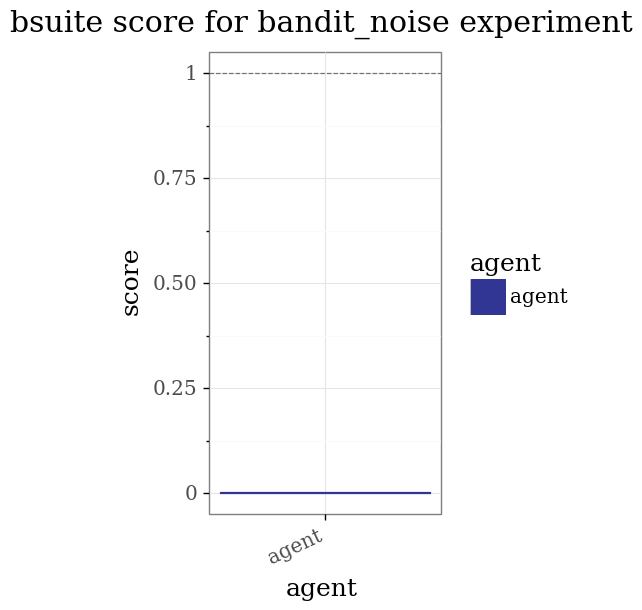

<ggplot: (-9223363310201386692)>

In [ ]:
#@title As well as plots specialized to the experiment
bandit_noise_df = DF[DF.bsuite_env == 'bandit_noise'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'bandit_noise')

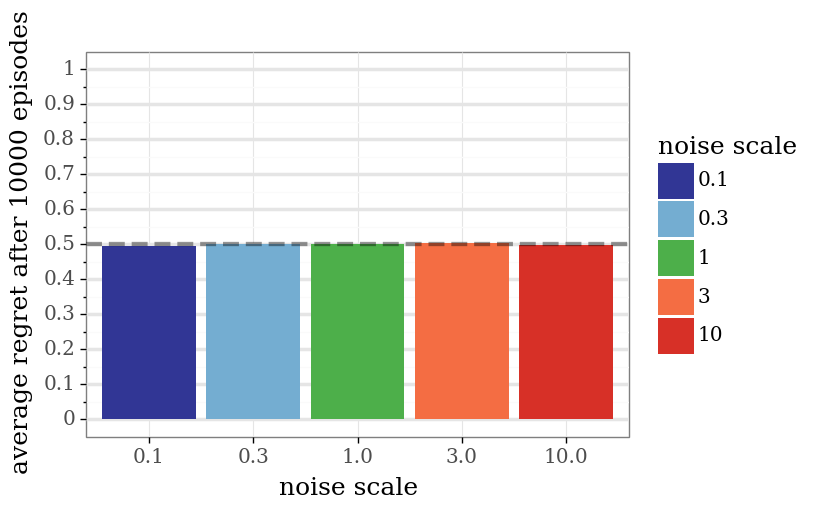

<ggplot: (-9223363310205564195)>

In [ ]:
#@title average regret over learning (lower is better)
from bsuite.experiments.bandit_noise import analysis as bandit_noise_analysis
bandit_noise_analysis.plot_average(bandit_noise_df)

## Running a baseline agent

So far we have only seen a very naive agent that doesn't perform any learning.

As part of our open source effort, we also released a collection of implementations.

In this section we will load a DQN agent, and then compare its performance against the random agent.


In [ ]:
!pip install -q bsuite[baselines]

     |████████████████████████████████| 102kB 5.5MB/s 
     |████████████████████████████████| 2.5MB 13.1MB/s 
     |████████████████████████████████| 421.8MB 31kB/s 
     |████████████████████████████████| 256kB 60.1MB/s 
     |████████████████████████████████| 450kB 46.6MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 3.9MB 49.2MB/s 
ERROR: tensorflow-probability 0.8.0 has requirement cloudpickle==1.1.1, but you'll have cloudpickle 1.3.0 which is incompatible.


In [ ]:
import bsuite
from bsuite.baselines import experiment
from bsuite.baselines.tf import dqn
from bsuite.baselines.tf import boot_dqn

SAVE_PATH_DQN = './logs/test_boot'
env = bsuite.load_and_record("deep_sea/10", save_path=SAVE_PATH_DQN, overwrite=True)
agent = boot_dqn.default_agent(
      obs_spec=env.observation_spec(),
      action_spec=env.action_spec()
)
experiment.run(agent, env, num_episodes=env.bsuite_num_episodes)

Loaded bsuite_id: deep_sea/10.
Logging results to CSV file for each bsuite_id in ./logs/test_boot.


KeyboardInterrupt: ignored

In [ ]:
#@title When loading multiple evaluations, `load_bsuite` automatically breaks them out by `SWEEP_VARS`
from bsuite.logging import csv_load
experiments = {'dqn': SAVE_PATH_DQN}
DF, SWEEP_VARS = csv_load.load_bsuite(experiments)

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


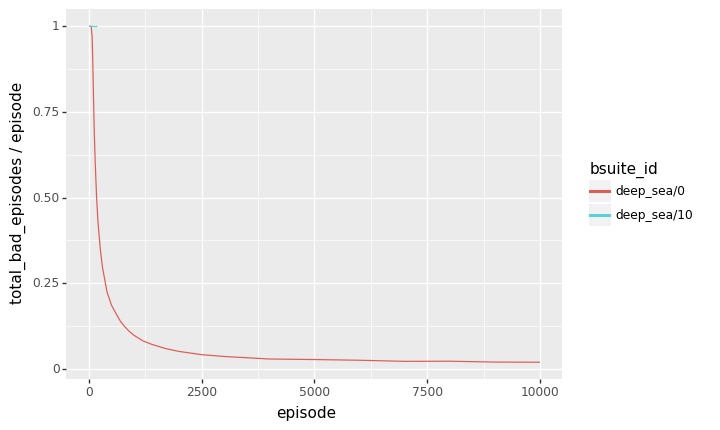

<ggplot: (-9223363271384467652)>

In [ ]:
p = (gg.ggplot(DF)
     + gg.aes(x='episode', y='total_bad_episodes / episode', group='bsuite_id', colour='bsuite_id')
     + gg.geom_line()
)
p

In [ ]:
import plotnine as gg

In [ ]:
#@title Run the default `dqn` agent on the `memory_len` experiment
from bsuite.baselines import experiment
from bsuite.baselines.tf import dqn

SAVE_PATH_DQN = '/tmp/bsuite/dqn'
for bsuite_id in sweep.BANDIT_NOISE:
  env = bsuite.load_and_record(bsuite_id, save_path=SAVE_PATH_DQN, overwrite=True)
  agent = dqn.default_agent(
      obs_spec=env.observation_spec(),
      action_spec=env.action_spec()
  )
  experiment.run(agent, env, num_episodes=env.bsuite_num_episodes)

Loaded bsuite_id: bandit_noise/0.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/dqn.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Loaded bsuite_id: bandit_noise/1.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/dqn.
Loaded bsuite_id: bandit_noise/2.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/dqn.
Loaded bsuite_id: bandit_noise/3.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/dqn.
Loaded bsuite_id: bandit_noise/4.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/dqn.
Loaded bsuite_id: bandit_noise/5.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/dqn.
Loaded bsuite_id: bandit_noise/6.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/dqn.
Loaded bsuite_id: bandit_noise/7.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/dqn.
Loaded bsuite_id: bandit_noise/8.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/dqn.
Loaded bsu

## Loading and comparing two agent runs

To compare the performance of the DQN and random agents, we simply point the load at the two save paths.

In [ ]:
#@title When loading multiple evaluations, `load_bsuite` automatically breaks them out by `SWEEP_VARS`
experiments = {'dqn': SAVE_PATH_DQN, 'rand': SAVE_PATH_RAND}
DF, SWEEP_VARS = csv_load.load_bsuite(experiments)

In [ ]:
#@title `SWEEP_VARS` is a list of columns that identify the separate agents
for var in SWEEP_VARS:
  print(var, DF[var].unique())

agent_name ['dqn' 'rand']


In [ ]:
#@title Passing `SWEEP_VARS` to `bsuite_score` automatically breaks out score by agent
BSUITE_SCORE = summary_analysis.bsuite_score(DF, SWEEP_VARS)
BSUITE_SCORE

,agent_name,level_1,bsuite_env,score,type,tags,finished
0,dqn,0,bandit_noise,0.744318,basic,"('basic',)",True
1,rand,0,bandit_noise,0.001521,basic,"('basic',)",True


tags=('basic',)


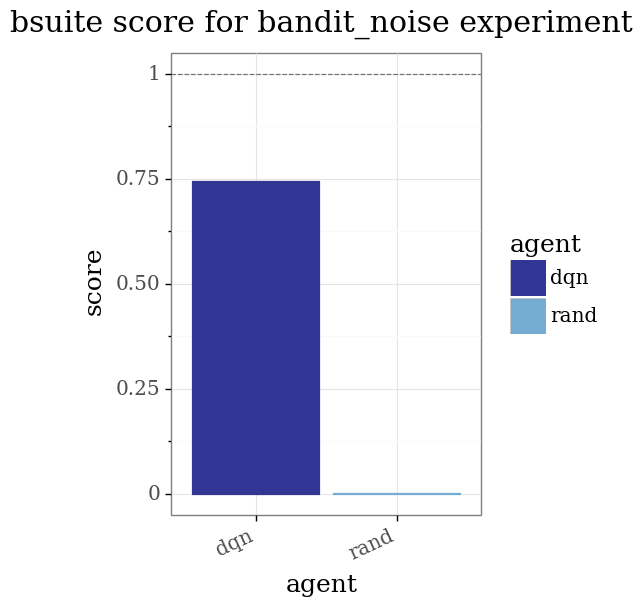

<ggplot: (8726560140622)>

In [ ]:
#@title All the `bsuite` plots will automatically compare performance on SWEEP_VARS
BSUITE_SCORE = summary_analysis.bsuite_score(DF, SWEEP_VARS)
bandit_noise_df = DF[DF.bsuite_env == 'bandit_noise'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'bandit_noise', SWEEP_VARS)

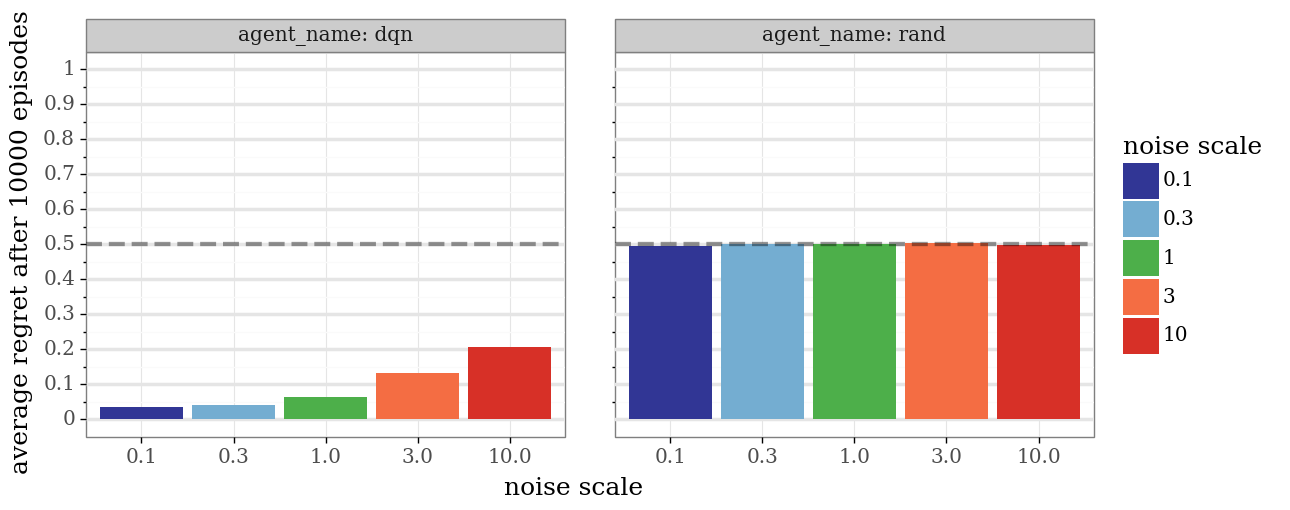

<ggplot: (-9223363310205618032)>

In [ ]:
#@title average regret over learning (lower is better)
bandit_noise_analysis.plot_average(bandit_noise_df, SWEEP_VARS)

## Build your own agents however you like!

The `bsuite` does not make any assumption about how you implement your agents.
<br>You can use `TensorFlow`, `JAX`, `Dopamine`, `OpenAI` baselines, or any other reinforcement learning framework .

For instance below we show how to run the PPO `OpenAI` baseline agent

In [ ]:
#@title 
!git clone https://github.com/openai/baselines.git
!pip install baselines/

In [ ]:
from baselines.common.vec_env import dummy_vec_env
from baselines.ppo2 import ppo2
from bsuite.utils import gym_wrapper
import tensorflow as tf


SAVE_PATH_PPO = '/tmp/bsuite/ppo'

def _load_env():
  raw_env = bsuite.load_and_record(
      bsuite_id='bandit_noise/0', 
      save_path=SAVE_PATH_PPO, logging_mode='csv', overwrite=True)
  return gym_wrapper.GymFromDMEnv(raw_env)
env = dummy_vec_env.DummyVecEnv([_load_env])

ppo2.learn(
    env=env, network='mlp', lr=1e-3, gamma=.99,
    total_timesteps=10000, nsteps=100)

In [ ]:
#@title The bsuite data has been logged in the same way
!cat /tmp/bsuite/ppo/bsuite_id_-_bandit_noise-0.csv

## Next steps

You now have a good introduction to the basic facility of running `bsuite` code.

For an example of the sort of output you can get through running a full `sweep.SWEEP` have a look at some pre-baked reports:
- www.bit.ly/bsuite-agents
- www.bit.ly/bsuite-optimizer
- www.bit.ly/bsuite-ensemble

There are lots more ways you can use `bsuite` in your research:
- Examples using `bsuite` from Dopamine framework.
- Automated `bsuite` appendix suitable for inclusion in conference paper.


If you have any questions or comments... please get in touch!

